In [1]:
import sys
sys.path.append("..")
from bisection.bisection import bisection
import sympy as sp
from sympy.plotting import plot as symplot
import pandas as pd
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from IPython.display import Math, Latex, Markdown

In [2]:
# Definimos la función de la cual queremos buscar las raíces

r = sp.symbols('r')
E = (1 /(2*r**2) - (5 / r) + 1)
E = sp.lambdify(r, E)

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in add


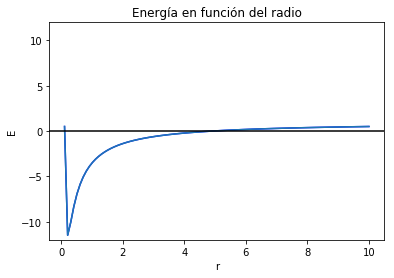

In [3]:
# Representamos los valores de la energía para ver por dónde pueden encontrarse las raíces

x_vals = linspace(0, 10, 100)
y_vals = E(x_vals)

plt.plot(x_vals, y_vals, color="b")
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="black")
plt.ylim([-12, 12])
plt.ylabel("E")
plt.xlabel("r")
plt.title("Energía en función del radio")
plt.show()


## Solución con el método de la bisección

Vemos que hay dos raíces, la primera parece estar entre 0 y 1 y la segunda entre 4 y 6. Por lo tanto, vamos a aplicar el método de la bisección entre los dos intervalos

## Primera raíz ($p_1$)

In [4]:
# Parametros del método de la bisección. intervalo aproximado, tolerancia y numero de iteraciones
a1 = 0.01
b1 = 1
tol = 1e-5
N0 = 20

In [5]:
p1, data1, convergence = bisection(E, a1, b1, tol, N0)

In [6]:
# Tabulate the data            
pd.set_option('display.precision', 10)
data1 = pd.DataFrame({'$a_n$':data1['a_matrix'],
                     '$b_n$' : data1['b_matrix'],
                     "$p_n$" : data1['p_matrix'],
                     "$f(p_{n})$" : data1['f_matrix'],
                     '$Error (\\frac{b_n - a_n}{2})$': data1['error_matrix']
                      })

data1.index = np.arange(1, len(data1) + 1, 1)
data1.index.name = '$n$'
data1 = data1[['$a_n$','$b_n$',"$p_n$", "$f(p_{n})$", '$Error (\\frac{b_n - a_n}{2})$']]

In [8]:
if convergence:
    print('Raíz: {} con intervalo inicial: ({}, {}) y tolerancia {} después de  {} iteraciones.'.format(p1, a1, b1, tol, len(data1) + 1))
    print('')
    display(data1)
else:
    print(p1)

Raíz: 0.10207984924316406 con intervalo inicial: (0.01, 1) y tolerancia 1e-05 después de  18 iteraciones.



,$a_n$,$b_n$,$p_n$,$f(p_{n})$,$Error (\frac{b_n - a_n}{2})$
$n$,,,,,
1,0.0100000000,1.0000000000,0.5050000000,-6.9403980002,0.4950000000
2,0.0100000000,0.5050000000,0.2575000000,-10.8767084551,0.2475000000
3,0.0100000000,0.2575000000,0.1337500000,-8.4331382654,0.1237500000
4,0.0100000000,0.1337500000,0.0718750000,28.2211720227,0.0618750000
5,0.0718750000,0.1337500000,0.1028125000,-0.3303646493,0.0309375000
6,0.0718750000,0.1028125000,0.0873437500,9.2949043302,0.0154687500
7,0.0873437500,0.1028125000,0.0950781250,3.7223212109,0.0077343750
8,0.0950781250,0.1028125000,0.0989453125,1.5386458947,0.0038671875
9,0.0989453125,0.1028125000,0.1008789062,0.5681709773,0.0019335938


## Segunda raíz ($p_2$)

In [65]:
# Parametros del método de la bisección. intervalo aproximado, tolerancia y numero de iteraciones
a2 = 4
b2 = 6
tol = 1e-5
N0 = 20

In [72]:
p2, data2, convergence = bisection(E, a2, b2, tol, N0)

In [73]:
# Tabulate the data            
pd.set_option('display.precision', 10)
data2 = pd.DataFrame({'$a_n$':data2['a_matrix'],
                     '$b_n$' : data2['b_matrix'],
                     "$p_n$" : data2['p_matrix'],
                     "$f(p_{n})$" : data2['f_matrix'],
                     '$Error (\\frac{b_n - a_n}{2})$': data2['error_matrix']
                      })

data.index = np.arange(1, len(data) + 1, 1)
data.index.name = '$n$'
data = data[['$a_n$','$b_n$',"$p_n$", "$f(p_{n})$", '$Error (\\frac{b_n - a_n}{2})$']]

In [75]:
if convergence:
    print('Raíz: {} con intervalo inicial: ({}, {}) y tolerancia {} después de  {} iteraciones.'.format(p2, a2, b2, tol, len(data) + 1))
    print('')
    display(data)
else:
    print(p2)

Raíz: 4.897911071777344 con intervalo inicial: (4, 6) y tolerancia 1e-05 después de  19 iteraciones.



,$a_n$,$b_n$,$p_n$,$f(p_{n})$,$Error (\frac{b_n - a_n}{2})$
$n$,,,,,
1,4.0000000000,6.0000000000,5.0000000000,0.0200000000,1.0000000000
2,4.0000000000,5.0000000000,4.5000000000,-0.0864197531,0.5000000000
3,4.5000000000,5.0000000000,4.7500000000,-0.0304709141,0.2500000000
4,4.7500000000,5.0000000000,4.8750000000,-0.0046022354,0.1250000000
5,4.8750000000,5.0000000000,4.9375000000,0.0078513059,0.0625000000
6,4.8750000000,4.9375000000,4.9062500000,0.0016633535,0.0312500000
7,4.8750000000,4.9062500000,4.8906250000,-0.0014596454,0.0156250000
8,4.8906250000,4.9062500000,4.8984375000,0.0001042915,0.0078125000
9,4.8906250000,4.8984375000,4.8945312500,-0.0006770662,0.0039062500
